# Linear Regression


  Regression refers to a set of methods for modeling the relationship between one or more independent variables and a dependent variable. In the natural sciences and social sciences, the purpose of regression is most often to characterize the relationship between the inputs and outputs. Machine learning, on the other hand, is most often concerned with prediction.

 Regression problems pop up whenever we want to predict a numerical value. Common examples include predicting prices (of homes, stocks, etc.), predicting length of stay (for patients in the hospital), demand forecasting (for retail sales), among countless others. Not every prediction problem is a classic regression problem. In subsequent sections, we will introduce classification problems, where the goal is to predict membership among a set of categories.

---



In [22]:
!pip install -U d2l

## Vectorization for Speed

When training our models, we typically want to process whole minibatches of examples simultaneously. Doing this efficiently requires that we vectorize the calculations and leverage fast linear algebra libraries rather than writing costly for-loops in Python.

In [21]:
!pip install torch torchvision

In [24]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

To illustrate why this matters so much, we can consider two methods for adding vectors. To start we instantiate two 10000-dimensional vectors containing all ones. In one method we will loop over the vectors with a Python for-loop. In the other method we will rely on a single call to +.

In [5]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)

In [7]:
# define a timer

class Timer:  #save
    """Record multiple running times."""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """Start the timer."""
        self.tik = time.time()

    def stop(self):
        """Stop the timer and record the time in a list."""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """Return the average time."""
        return sum(self.times) / len(self.times)

    def sum(self):
        """Return the sum of time."""
        return sum(self.times)

    def cumsum(self):
        """Return the accumulated time."""
        return np.array(self.times).cumsum().tolist()

In [8]:
# First, add one coordinate at a time, using a for-loop.

c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.23098 sec'

In [9]:
# Alternatively, you can rely on the reloaded + operator to compute the elementwise sum

timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00130 sec'

## The Normal Distribution and Squared Loss

While you can already get your hands dirty using only the information above, in the following we can more formally motivate the squared loss objective via assumptions about the distribution of noise.

Linear regression was invented by Gauss in 1795, who also discovered the normal distribution (also called the Gaussian). It turns out that the connection between the normal distribution and linear regression runs deeper than common parentage.

To refresh your memory, the probability density of a normal distribution is given as

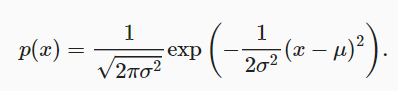



In [10]:
# define a Python function to compute the normal distribution

def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

In [ ]:
# visualize the normal distributions

# Use numpy again for visualization
x = np.arange(-7, 7, 0.01)

# Mean and standard deviation pairs
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

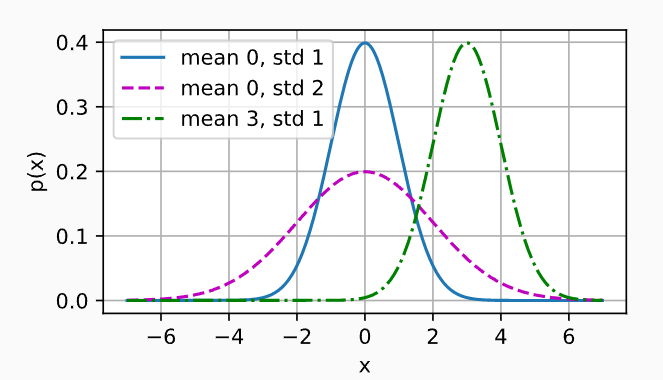